## Speed of Light

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

michelson = pd.read_csv('michelson_speed_of_light.csv')
michelson.head()


,Unnamed: 0,date,distinctness of image,temperature (F),position of deflected image,position of slit,displacement of image in divisions,difference between greatest and least,B,Cor,revolutions per second,radius (ft),value of one turn of screw,velocity of light in air (km/s),remarks
0,0,June 5,3,76,114.85,0.300,114.55,0.17,1.423,-0.132,257.36,28.672,0.99614,299850,Electric light.
1,1,June 7,2,72,114.64,0.074,114.56,0.10,1.533,-0.084,257.52,28.655,0.99614,299740,P.M. Frame inclined at various angles
2,2,June 7,2,72,114.58,0.074,114.50,0.08,1.533,-0.084,257.52,28.647,0.99614,299900,P.M. Frame inclined at various angles
3,3,June 7,2,72,85.91,0.074,85.84,0.12,1.533,-0.084,193.14,28.647,0.99598,300070,P.M. Frame inclined at various angles
4,4,June 7,2,72,85.97,0.074,85.89,O.07,1.533,-0.084,193.14,28.650,0.99598,299930,P.M. Frame inclined at various angles


In [8]:
michelson_speed_of_light = michelson['velocity of light in air (km/s)']
michelson_speed_of_light.head()

0    299850
1    299740
2    299900
3    300070
4    299930
Name: velocity of light in air (km/s), dtype: int64

### Plot Empirical and Theoritical CDF

In [3]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    
    return x, y



In [4]:
# Theoritical CDF
mean = np.mean(michelson_speed_of_light)
std = np.std(michelson_speed_of_light)
samples = np.random.normal(mean, std, size=10000)
x_theor, y_theor = ecdf(samples)

# Empirical CDF
x, y = ecdf(michelson_speed_of_light)


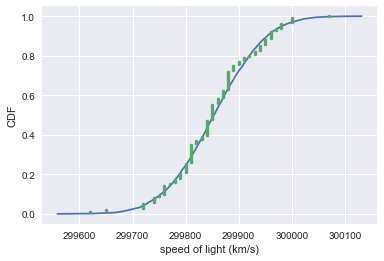

In [6]:
sns.set()
_ = plt.plot(x_theor, y_theor)  # Theoritical CDF (Blue)
_ = plt.plot(x, y, marker='.', linestyle='none') # Empirical CDF (green)
_ = plt.xlabel('speed of light (km/s)')
_ = plt.ylabel('CDF')
plt.show()

### Bootstrap

In [15]:
bs_sample = np.random.choice(michelson_speed_of_light, size=100)

print("Bootstrap mean: ",np.mean(bs_sample))
print("Bootstrap median: ",np.median(bs_sample))
print("Bootstrap standard deviation: ",np.std(bs_sample))

Bootstrap mean:  299857.2
Bootstrap median:  299850.0
Bootstrap standard deviation:  84.9597551786


#### Generating one bootstrap replicate

In [20]:
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

In [21]:
bootstrap_replicate_1d(michelson_speed_of_light, np.mean)

299848.29999999999

In [22]:
bootstrap_replicate_1d(michelson_speed_of_light, np.median)

299850.0

In [23]:
bootstrap_replicate_1d(michelson_speed_of_light, np.std)

74.180523050191553

#### Generating many bootstrap replicates

In [24]:
bs_replicates = np.empty(10000)
for i in range(10000):
    bs_replicates[i] = bootstrap_replicate_1d(michelson_speed_of_light, np.mean)

#### Graphical bootstrap estimate of the mean (confidence intervals)

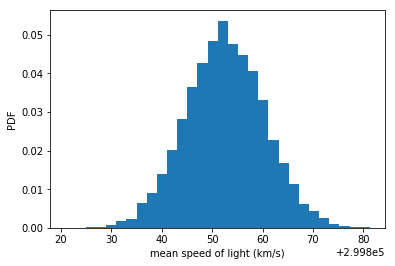

In [25]:

_ = plt.hist(bs_replicates, bins=30, normed=True)
_ = plt.xlabel('mean speed of light (km/s)')
_ = plt.ylabel('PDF')
plt.show()

#### Finding the confidence intervals

In [26]:
#### to get the 95th confidence intervals 2.5+2.5 = 5 
conf_int = np.percentile(bs_replicates, [2.5, 97.5])
conf_int

array([ 299837.2,  299867.8])

### One sample test
is a test in which you compare one set of data to a single number.

The Null hypothesis we test in this data is ** "The true mean speed of light in Michelson’s experiments was actually Newcomb's reported value"**

#### Shiftting the Michelson data

In [59]:
newcomb_value = 299860  # km/s
michelson_shifted = michelson_speed_of_light / - np.mean(michelson_speed_of_light) + newcomb_value


#### Generating many bootstrap replicates

We used bootstrapping to stimulate data aquisition of under the null hypothesis.

In [ ]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates


#### Calculating the test statistic
The test statistic is the mean of bootstrapped samples minus newcomb values

In [29]:
def diff_from_newcomb(data, newcomb_value=299860):
    return np.mean(data) - newcomb_value

diff_obs = diff_from_newcomb(michelson_speed_of_light)
diff_obs

-7.599999999976717

#### Computing the p-value

In [57]:
diff_observed = - 260408.00000009  # observed data 
bs_replicates = draw_bs_reps(michelson_shifted, diff_from_newcomb, 10000)
p_value = np.sum(bs_replicates <= diff_observed) / 10000
p_value

0.0146

This means that newcomb and michelson don't have fundemental differences in their measurements.